In [ ]:
# Reinstall Qiskit packages and simulators
%pip install qiskit[visualization]
%pip install qiskit qiskit-aer
%pip install pylatexenc
%pip install seaborn
from qiskit import *
from qiskit_aer.aerprovider import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_state_qsphere, circuit_drawer, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=782a92dd2b11fee247edc46547b3a26d804f6e575df6133e587363d6b40613cf
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.9 MB/s eta 0:00:00


# **Grover's Algorithm**


Supplementary slides for Grover's Algorithm can be found [HERE](https://docs.google.com/presentation/d/1E67BCZJhfusYOx4kn0Jlw_DebxsCCw88/edit?slide=id.p1#slide=id.p1)

---


## Overview

Grover's algorithm, or the Quantum Search Algorithm, solves the **unstructured search** problem by finding the unique or marked input of an unknown function from a set N elements.

- The unstructured search problem can be described as a search for a specific element in a set with no specified structure, order, or search algorithm associated with the set. With **Grover's Algortithm**, we can identify this element with high probability.
Classical algorithms are only able to solve unstructured search by evaluating each element in the set one at a time. Meaning in worst case, our algorithm will have a time complexity of O(N), which is inefficent for large data sets.
Grover's Algorithm reduces the time complexity to O(√N).

    ![](https://drive.google.com/uc?export=view&id=1FRsbXAjfl3ix30eig-Fg-ytC9w0u3mUM)

## Grover Circuit

Grover's algorithm can be represented in a quantum circuit comprised of our three main search steps
1. Initializing the search space
2. The Oracle
3. The diffusion operator (mean inversion and amplification)

  ![](https://drive.google.com/uc?export=view&id=13zsFDHj-81btoHiYY4bVy9BGjAmc78WL)

## Protocol

To implement Grover's Algorithm we can divide the search process into 3 steps. To best explain this, we will use an example of a system of 3 qbits.
- remember that with 3 qbits, we can have a superposition of 8 states $$|000\rangle, |001\rangle, |010\rangle, |100\rangle, |011\rangle, |101\rangle, |110\rangle, |111\rangle$$
1. First we need to start with an equally probable data set, or a superposition of all of our possible states. $$ |\psi\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} $$ In the case of a 3 qbit system, it would look like this:
    ![](https://drive.google.com/uc?export=view&id=130iMdawEKPzWsgEpOmiOL5IuXw0OThYg)

$$ |\psi\rangle = \frac{1}{\sqrt{8}} \sum_{x=0}^7 |x\rangle = \frac{1}{\sqrt{8}} [|000\rangle + |001\rangle + ... + |110\rangle + |111\rangle]$$
2. We then need to flip the sign of our target/input state, (i.e. from positive to negative).
    - To best illustrate what is happening in our set, we can graph the probability amplitude of each state in our set:
    ![](https://drive.google.com/uc?export=view&id=1KgRJC-uDw6Ryj-1x5K63ZFfJE5eI8PXX)

3. After flipping the sign we need to do an inversion about the mean. After steps 1 and 2, the mean is centered near our target state. By inverting about the mean, we increase the probability amplitude of the target, while other states are decreased, but still in an equal superposition.
    - After inversion, the graph would look like this:
    ![](https://drive.google.com/uc?export=view&id=1v86i23d2A3ACelgp5GQ56xRbRtMXRmtM)

Steps **2 and 3** can be repeated over multiple iterations to further increase the probability of our desired state. The more we iterate the amplitude amplification, the higher the probability of observing our desired state. However, it is possible to overshoot the number of iterations, where the amplitude amplification instead results in a decreased probability.
- To avoid this, we can use a [fixed-point variant](https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification#fixed-point-amplitude-amplification) of amplitude amplification in Qiskit.
- Or more simply, we can also calculate the ideal number of iterations using the following formula: $$ t \leq \Bigg[\frac{\pi}{4} \sqrt{\frac{2^n}{m}}\Bigg] $$
    where m is the number of answers we are looking for (if we are looking for one answer, m = 1)

*Let's try implementing Grover's algorithm to identify a single state in the 3 qbit system we've been using as an example:*
With Qiskit we can use the **Grover Operator** to implement our algorithm. For this we'll need an oracle for the algorithm to work off of and we'll create the search space for our data set.

In [ ]:
#generate a quantum cricuit with our 3 qbits and 3 cbits for measurement
grover = QuantumCircuit(3)

### The Search Space
1. First we need to start by setting up the **search space**
    We'll need our search space to be in an even superposition across all states, which can do with a Hadamard gate on each qbit

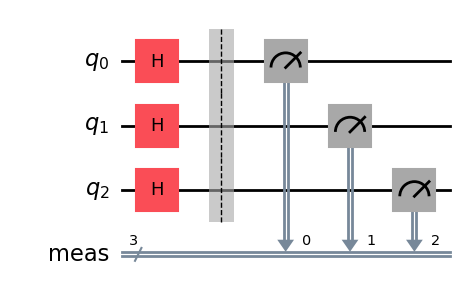

In [ ]:
#Copy or rewrite the sate we made earlier
grover.h(0)
grover.h(1)
grover.h(2)
grover.measure_all()

grover.draw('mpl')

Let's check on the probability of our 8 states at this point in our algorithm by plotting a histogram

{'011': 317, '111': 294, '110': 279, '001': 314, '010': 294, '000': 312, '100': 299, '101': 291}


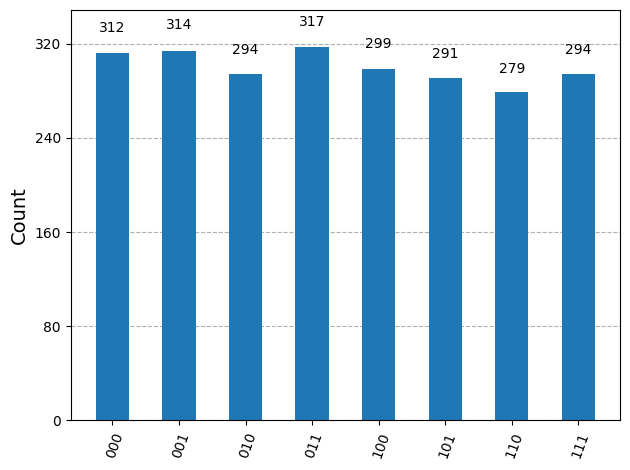

In [ ]:
# Set up the QiskitAer Simulator to take measurements and plot them on a histogram
backend = AerSimulator()
N = 2400 # try to consider large values divisible by 8 to check on the accuracy of our state.
result = backend.run(transpile(grover, backend), shots=N).result()
counts = result.get_counts(grover)

print(counts)
plot_histogram(counts)

# the probability will not be perfect but we can expect a close to even distribution if we run the measurement a few times

### The Oracle
2. With our search space set up, we can now work on setting up the oracle for our search
The oracle we create will be based on the specific input(s) we plan to search for.
For this exammple we will use the state |100〉as our target state.
- The oracle in Grover's circuit is what we use to add a negative phase to our target state
- For any state |x〉we can define this as a diagonal matrix, similar to I, where our target state is "marked" by a negative
$$ U_\omega|x\rangle = \bigg\{ \begin{aligned} \phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\ -|x\rangle \quad \text{if} \; x = \omega \\ \end{aligned} $$
Creating a diagonal matrix of the following form

$$ U_\omega|x\rangle = (-1)^{f(x)}|x\rangle $$

$$
U_\omega =
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}
$$

In the case of the our 3-qbit cricuit, the oracle will look like an 8x8 diagonal matrix with and inversion on our target state:
$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & {\color {red} -}{\color{red}1} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

where the highlighted -1 represents our target state |100〉and is simply defined with the expression
$$ U_\omega|100\rangle = \bigg\{ \begin{aligned} \phantom{-}|100\rangle \quad \text{if} \; \omega \neq (100) \\ -|100\rangle \quad \text{if} \; \omega = (100) \\ \end{aligned} $$

We can create this oracle matrix in qiskit using the a function which allows us to convert a separate quantum circuit into a black-box function that we can add to our existing circuit as a gate.
        
    Oracle Circuit Name = CircuitName.to_gate()



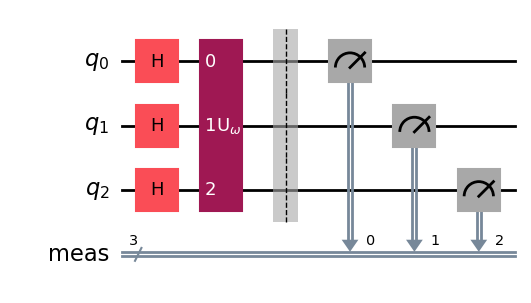

In [ ]:
circ = QuantumCircuit(3)
circ.cz(1, 2)
circ.cz(0, 2)
oracle = circ.to_gate()
oracle.name = "U$_\omega$"

# It may help to declare the grover circuit again then apply our oracle
grover = QuantumCircuit(3)
grover.h(0)
grover.h(1)
grover.h(2)

grover.append(oracle, [0,1,2])
grover.measure_all()
grover.draw('mpl')

### The Diffuser

The diffuser circuit is what we'll use to do the amplitude amplification step of our search algorithm.
An important operation in setting up the deffuser is the *Multi-Controlled-Z* (CCZ) gate. We went over the Toffoli (CCNOT/CCX) gate prior, but Qiskit allows us to generate a controlled-z gate with 2 controls to 1 target.

    name.ccz(control 1, control 2, target)

*The same operation can be done by chaining a Hadamard, CCNOT, and Hadarmard in sequence on the same target qbit.*

After setting up the diffuser circuit, we can convert it into a black box gate, similar to how we did for the oracle, and append it accross our circuit. We can also implement the circuit to run multiple iterations of our amplitude amplification for the best probability possible.
- Based on the ideal iteration equation from earlier we need 2 iterations of this step for the best possible amplification $$ t \leq \Bigg[\frac{\pi}{4} \sqrt{\frac{8}{1}}\Bigg] = 2.221 \approx 2 $$


Let's implment a diffuser for the marked qbit |100〉to run for 2 iterations:

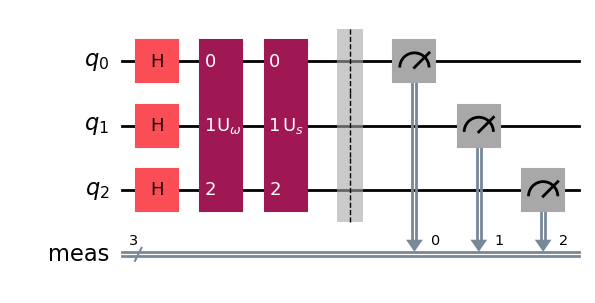

In [ ]:
#initialize circuit with equal superposition
circ2 = QuantumCircuit(3)
circ2.h(0)
circ2.h(1)
circ2.h(2)

#inversion on marked input

circ2.ccz(0,1,2)
#alternate ccz initialization
#circ2.h(2)
#circ2.ccx(0,1,2)
#circ2.h(2)

#reflection and amplitude amplification
circ2.x(0)
circ2.x(1)
circ2.x(2)

circ2.h(0)
circ2.h(1)
circ2.h(2)

circ2.ccz(0,1,2)
#circ2.h(2)
#circ2.ccx(0,1,2)
#circ2.h(2)

circ2.h(0)
circ2.h(1)
circ2.h(2)

circ2.x(0)
circ2.x(1)
circ2.x(2)

##second iteration
#inversion on marked input
circ2.ccz(0,1,2)

#reflection and amplitude amplification
circ2.x(0)
circ2.x(1)
circ2.x(2)

circ2.h(0)
circ2.h(1)
circ2.h(2)

circ2.ccz(0,1,2)

circ2.h(0)
circ2.h(1)
circ2.h(2)

circ2.x(0)
circ2.x(1)
circ2.x(2)



#convert diffuser circuit to black box
diffuser = circ2.to_gate()
diffuser.name = "U$_s$"

# It may help to declare the grover circuit again then apply our oracle
grover = QuantumCircuit(3)
grover.h(0)
grover.h(1)
grover.h(2)

grover.append(oracle, [0,1,2])
grover.append(diffuser, [0,1,2])
grover.measure_all()
grover.draw('mpl')

{'001': 606, '011': 635, '111': 642, '101': 620, '010': 615, '000': 580, '110': 612, '100': 5690}


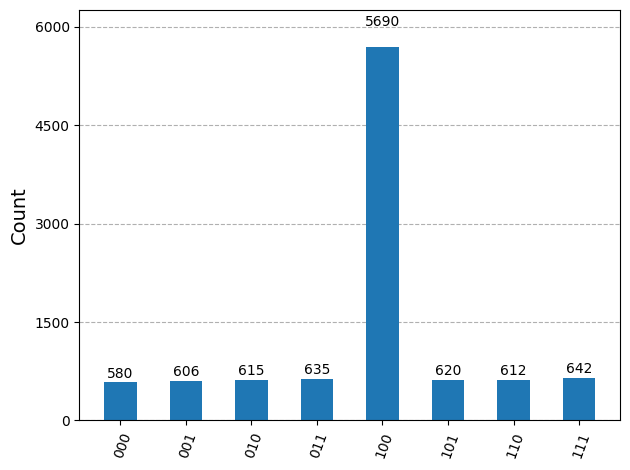

In [ ]:
# Set up the QiskitAer Simulator to take measurements and plot them on a histogram
backend = AerSimulator()
N = 10000 # try to consider large values divisible by 8 to check on the accuracy of our state.
result = backend.run(transpile(grover, backend), shots=N).result()
counts = result.get_counts(grover)

print(counts)
plot_histogram(counts)

# the probability will not be perfect but we can expect a close to even distribution if we run the measurement a few times

The histogram generated should show that our marked input has a much higher probability at measurement.

# Tomorrow's Session:
- Quantum Variational Algorithms
  - Quantum Approximate Optimization algorithms
  - Quantum Neural Networks
  - Quantum Autoencoders
  - Quantum kernels and feature map

 **SEE YOU TOMORROW**



 *Prepared by Erin Diran-Ojo for the ISIT 2025 Quantum Hackathon*

![](https://drive.google.com/uc?export=view&id=1-iKFdcD2sGyoTg0V9VgOUwo2Yiwsurm7)

![](https://drive.google.com/uc?export=view&id=1GkYreZpjLdmmmARYqenYpDF6Wupe4Hal)
